In [75]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [76]:
dataset = pd.read_csv('data/iris.csv', header=None)

In [77]:
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
dataset.columns = ['sepal_length','sepal_width','petal_length','petal_width', 'species']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [80]:
from sklearn.utils import shuffle
shuffle(dataset)

,sepal_length,sepal_width,petal_length,petal_width,species
116,6.5,3.0,5.5,1.8,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor
135,7.7,3.0,6.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor
...,...,...,...,...,...
46,5.1,3.8,1.6,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
74,6.4,2.9,4.3,1.3,Iris-versicolor


In [81]:
from sklearn.model_selection import train_test_split
features = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
labels = dataset['species']
features_train, features_test, labels_train, labels_test = train_test_split(
  features,labels , test_size=0.2, shuffle=True)

In [82]:
features_train= np.asarray(features_train)
features_test= np.asarray(features_test)
labels_train= np.asarray(labels_train)
labels_test= np.asarray(labels_test)
print(features_train)

[[4.9 3.1 1.5 0.1]
 [6.  2.2 4.  1. ]
 [6.6 2.9 4.6 1.3]
 [7.2 3.2 6.  1.8]
 [5.6 2.5 3.9 1.1]
 [5.8 2.7 3.9 1.2]
 [5.5 2.4 3.7 1. ]
 [7.2 3.  5.8 1.6]
 [7.9 3.8 6.4 2. ]
 [5.7 3.8 1.7 0.3]
 [4.8 3.1 1.6 0.2]
 [5.5 4.2 1.4 0.2]
 [6.8 3.  5.5 2.1]
 [4.9 3.  1.4 0.2]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.  1.2]
 [6.9 3.1 5.1 2.3]
 [5.7 4.4 1.5 0.4]
 [6.3 2.7 4.9 1.8]
 [5.5 2.5 4.  1.3]
 [5.8 2.7 4.1 1. ]
 [5.1 3.7 1.5 0.4]
 [6.3 2.5 5.  1.9]
 [5.1 3.8 1.9 0.4]
 [6.  2.2 5.  1.5]
 [5.  3.5 1.6 0.6]
 [5.  3.3 1.4 0.2]
 [6.3 3.3 4.7 1.6]
 [6.1 3.  4.6 1.4]
 [6.8 3.2 5.9 2.3]
 [5.2 2.7 3.9 1.4]
 [6.4 2.7 5.3 1.9]
 [4.6 3.2 1.4 0.2]
 [6.1 3.  4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [6.4 2.8 5.6 2.2]
 [6.8 2.8 4.8 1.4]
 [5.8 2.7 5.1 1.9]
 [6.  3.  4.8 1.8]
 [6.5 3.  5.8 2.2]
 [6.5 3.  5.5 1.8]
 [5.9 3.  5.1 1.8]
 [5.5 2.6 4.4 1.2]
 [5.7 2.8 4.5 1.3]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  4.2 1.5]
 [5.6 3.  4.1 1.3]
 [5.8 4.  1.2 0.2]
 [6.9 3.1 4.9 1.5]
 [5.  2.  3.5 1. ]
 [5.4 3.9 1.7 0.4]
 [6.1 2.6 5.6 1.4]
 [7.2 3.6 6.

In [83]:
def normalize(train, test):
    min_val = np.min(train, axis=0)
    max_val = np.max(train, axis=0)
    train_norm = (train - min_val) / (max_val - min_val)
    test_norm = (test - min_val) / (max_val - min_val)
    return train_norm, test_norm
features_train, features_test = normalize(features_train, features_test)
print(features_train)

[[0.14285714 0.45833333 0.08474576 0.        ]
 [0.45714286 0.08333333 0.50847458 0.375     ]
 [0.62857143 0.375      0.61016949 0.5       ]
 [0.8        0.5        0.84745763 0.70833333]
 [0.34285714 0.20833333 0.49152542 0.41666667]
 [0.4        0.29166667 0.49152542 0.45833333]
 [0.31428571 0.16666667 0.45762712 0.375     ]
 [0.8        0.41666667 0.81355932 0.625     ]
 [1.         0.75       0.91525424 0.79166667]
 [0.37142857 0.75       0.11864407 0.08333333]
 [0.11428571 0.45833333 0.10169492 0.04166667]
 [0.31428571 0.91666667 0.06779661 0.04166667]
 [0.68571429 0.41666667 0.76271186 0.83333333]
 [0.14285714 0.41666667 0.06779661 0.04166667]
 [0.         0.5        0.05084746 0.04166667]
 [0.4        0.25       0.50847458 0.45833333]
 [0.71428571 0.45833333 0.69491525 0.91666667]
 [0.37142857 1.         0.08474576 0.125     ]
 [0.54285714 0.29166667 0.66101695 0.70833333]
 [0.31428571 0.20833333 0.50847458 0.5       ]
 [0.4        0.29166667 0.52542373 0.375     ]
 [0.2        

In [84]:
class KNN:
    def __init__(self, k):
        self.k = k

    def train(self, features, labels):
        self.features_train = features
        self.labels_train = labels
        
    def calculate_distances(self, x_test_point):
        euclidean_distances = np.sqrt(np.sum((self.features_train - x_test_point) ** 2, axis=1))
        return pd.DataFrame(data=euclidean_distances, columns=['distance'])
    
    def find_nearest_neighbors(self, distances):
        return distances.sort_values(by=['distance'], axis=0)[:self.k]
    
    def most_commonlabel(self, nearest_neighbors):
        nearest_labels = self.labels_train[nearest_neighbors.index]
        votes = self.count(nearest_labels) 
        return max(votes, key=votes.get)
    
    def count(self, labels):
        counts = {}
        for label in labels:
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        return counts
    
    def classify(self, test_features):
        predictions = []
        for x_test_point in test_features:
            distances = self.calculate_distances(x_test_point)
            nearest_neighbors = self.find_nearest_neighbors(distances)
            prediction = self.most_commonlabel(nearest_neighbors)
            predictions.append(prediction)
        return predictions


In [85]:
model = KNN(3)
model.train(features_train, labels_train)
training_pred = model.classify(features_train)
testing_pred =  model.classify(features_test)
print(training_pred)
print(testing_pred)


['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Ir

In [86]:
training_accuracy = np.sum(training_pred == labels_train)/len(labels_train)
testing_accuracy = np.sum(testing_pred == labels_test)/len(labels_test)
print(f'The accuracy of our training is {training_accuracy} for k=3')
print(f'The accuracy of our testing is {testing_accuracy} for k=3')

The accuracy of our training is 0.9583333333333334 for k=3
The accuracy of our testing is 0.9666666666666667 for k=3


## Varying the Value of K and running the process 20 times

In [87]:
k_values = range(1, 52, 2)
training_accuracies = {k: [] for k in k_values}
testing_accuracies = {k: [] for k in k_values}
for k in k_values:
   for _ in range(20):
      shuffle(dataset)
      features = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
      labels = dataset['species']
      features_train, features_test, labels_train, labels_test = train_test_split(features,labels , test_size=0.2, shuffle=True)
      features_train= np.asarray(features_train)
      features_test= np.asarray(features_test)
      labels_train= np.asarray(labels_train)
      labels_test= np.asarray(labels_test)
      features_train, features_test = normalize(features_train, features_test)
      model = KNN(k)
      model.train(features_train, labels_train)
      training_pred = model.classify(features_train)
      testing_pred =  model.classify(features_test)
      training_accuracy = np.sum(training_pred == labels_train)/len(labels_train)
      testing_accuracy = np.sum(testing_pred == labels_test)/len(labels_test)
      training_accuracies[k].append(training_accuracy)
      testing_accuracies[k].append(testing_accuracy)
avg_training_accuracy = [np.mean(training_accuracies[k]) for k in k_values]
avg_testing_accuracy = [np.mean(testing_accuracies[k]) for k in k_values]


**Q1.1 (10 Points)** In the first graph, you should show the value of k on the horizontal axis,
and on the vertical axis, the average accuracy of models trained over the training set, given
that particular value of k. Also show, for each point in the graph, the corresponding standard
deviation; you should do this by adding error bars to each point. The graph should look like the
one in Figure 2 (though the “shape” of the curve you obtain may be different, of course).

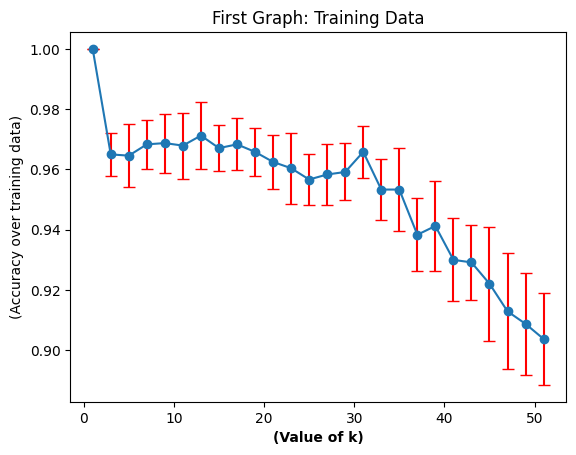

In [88]:
std_training_accuracy= [np.std(training_accuracies[k]) for k in k_values]
plt.errorbar(k_values, avg_training_accuracy, yerr=std_training_accuracy, label='First Graph', fmt='-o', capsize=4, capthick=1, ecolor='red')
plt.xlabel('(Value of k)', fontweight='bold')
plt.ylabel('(Accuracy over training data)')
plt.title('First Graph: Training Data')
plt.show()

**Q1.2 (10 Points)** In the second graph, you should show the value of k on the horizontal axis,
and on the vertical axis, the average accuracy of models trained over the testing set, given
that particular value of k. Also show, for each point in the graph, the corresponding standard
deviation by adding error bars to the point.


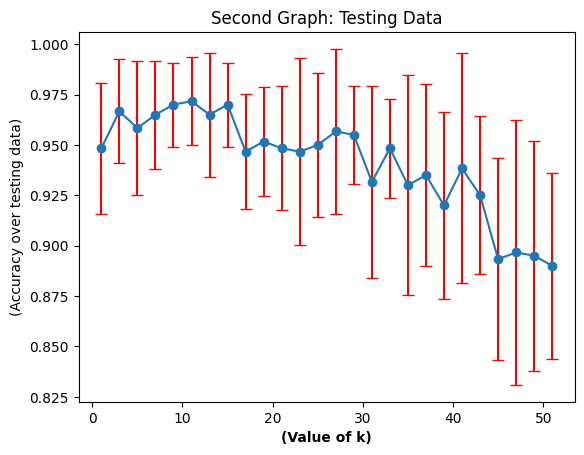

In [89]:
std_testing_accuracy= [np.std(testing_accuracies[k]) for k in k_values]
plt.errorbar(k_values, avg_testing_accuracy, yerr=std_testing_accuracy, label='Second Graph', fmt='-o', capsize=4, capthick=1, ecolor='red')
plt.xlabel('(Value of k)', fontweight='bold')
plt.ylabel('(Accuracy over testing data)')
plt.title('Second Graph: Testing Data')
plt.show()

### This is for Q1.5:

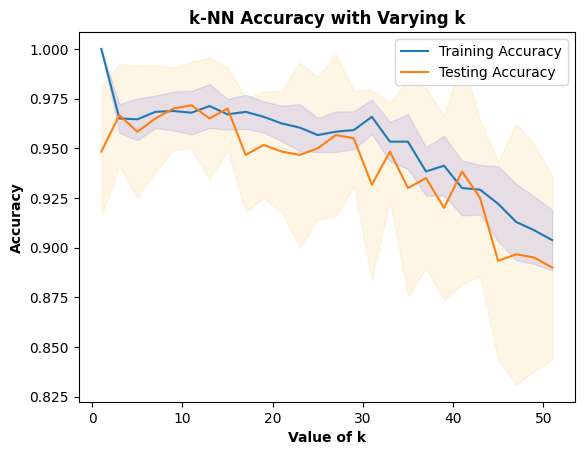

In [90]:
k_values = np.array(k_values)
avg_training_accuracy = np.array(avg_training_accuracy)
std_training_accuracy = np.array(std_training_accuracy)
avg_testing_accuracy = np.array(avg_testing_accuracy)
std_testing_accuracy = np.array(std_testing_accuracy)
plt.plot(k_values, avg_training_accuracy, label='Training Accuracy')
plt.fill_between(k_values, avg_training_accuracy - std_training_accuracy, avg_training_accuracy + std_training_accuracy, alpha=0.1, color='blue')
plt.plot(k_values, avg_testing_accuracy, label='Testing Accuracy')
plt.fill_between(k_values, avg_testing_accuracy - std_testing_accuracy, avg_testing_accuracy + std_testing_accuracy, alpha=0.1, color='orange')
plt.xlabel('Value of k', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('k-NN Accuracy with Varying k', fontweight='bold')
plt.legend()
plt.show()

In [91]:
optimal_k = k_values[0]
max_accuracy = 0
min_std_dev = np.inf
for k, mean_acc, std_dev in zip(k_values, avg_testing_accuracy, std_testing_accuracy):
    if mean_acc > max_accuracy or (mean_acc == max_accuracy and std_dev < min_std_dev):
        optimal_k = k
        max_accuracy = mean_acc
        min_std_dev = std_dev
print(f"Optimal k is {optimal_k} with Testing Accuracy: {max_accuracy} and Standard Deviation: {min_std_dev}")


Optimal k is 11 with Testing Accuracy: 0.9716666666666665 and Standard Deviation: 0.021794494717703363


**Q1.3 (8 Points)** Explain intuitively why each of these curves looks the way they do. First,
analyze the graph showing performance on the training set as a function of k. Why do you think
the graph looks like that? Next, analyze the graph showing performance on the testing set as a
function of k. Why do you think the graph looks like that?


The graph showing performance on the training set as a function of k, has an accuracy of 1 when k=1 because in this case each instance's nearest neighbor is itself, so we're not comparing it to other instances in the training set so the model is memorizing the data as it is. However, the accuracy starts dropping after this because now more neighbors are being considered, hence there's more uncertainty about which class the instances belong to, not all neighbors will share the same label necessarily. We see that the standard deviation is small because the model has already seen and been trained on this dataset.

On the other hand, the graph showing performance on the testing set shows a much higher standard deviation and this is mainly because the instances in that dataset are new to the model and have not been used during its training it shows the uncertainty this model faces when making new predictions. The accuracy is still pretty high but not as high as the training set, it ranges 0.89-0.97 approximately.The accuracy reaches it's peak at some k but then when we increase the value of k the accuracy starts decreasing and alternating this might be due to the fact that it becomes very generalized as it considers too many neighbors hence not ignoring noise and outliers. So, the reason why for large value of k the accuracy starts decreasing is that the model becomes overly generalized. For small value of k the accuracy seem pretty high which might be because in our dataset nearest neighbors belong to the same class/label or maybe because the training data did a good job of showing the variations within classes, or there might be other explanations

**Q1.4 (6 Points)** We say that a model is underfitting when it performs poorly on the training
data (and most likely on the testing data as well). We say that a model is overfitting when it
performs well on training data but it does not generalize to new instances. Identify and report
the ranges of values of k for which k-NN is underfitting, and ranges of values of k for which
k-NN is overfitting.


Let's start but giving the definition of overfitting and underfitting. Overfitting imply that the model is well on the training data but has poor performance when new data is coming. Underfitting refers to a model that is not good on the training data and also cannot be generalized to predict new data. Underfitting happens for the values of k between [33, 51] (interval is changing everytime I run the file again but this should be a good estimate --> large values of k) like I mentioned earlier this might be representative of the fact that our algorithm reached a point where it's considering too many neighbors which will lead to poor performance on both the training and testing datasets, we also have to keep in mind that we have 151 instances so  51 neighbors is like considering 1/3 of the total instances in the entire dataset. We might also consider that it might beccome bias towards the majority class if we take too many neighbors even in areas where it should predict the minority class since it's more prelevant.

I don't think in our case there is a clear case of overfitting but we can say that it happens for the values of k in the range [1, 7] (small values of k).The reason why the accuracy of the testing and training datasets is somewhat simiar for small values of k might be because the nearest neighbors in our case are more likely to belong to the same class, so it's noise free, so the predictions are based on correct examples of neighbors; the decision boundaries between labels might be simple (linear). It might be due to a lot of reasons and these are some valid assumptions or explanations to why.

**Q1.5 (6 Points)** Based on the analyses made in the previous question, which value of k would
you select if you were trying to fine-tune this algorithm so that it worked as well as possible in
real life? Justify your answer.


If I were to fine-tune this algorithm so that it worked as well as possible in real life I would choose a value of k such that the mean accuracy on the testng is high but also the mean accuracy of training is high too, so that there is good balance between the two. I would also want the standard deviation of accuracy to be somewhat low. So based on all those mentioned above and using the graph I plotted and the code I wrote I would take k to be equal to 11.

**Q1.6 (10 Points)** In the experiments conducted earlier, you normalized the features before
running k-NN. This is the appropriate procedure to ensure that all features are considered
equally important when computing distances. Now, you will study the impact of omitting feature
normalization on the performance of the algorithm. To accomplish this, you will repeat Q1.2
and create a graph depicting the average accuracy (and corresponding standard deviation) of
k-NN as a function of k, when evaluated on the testing set. However, this time you will run the
algorithm without first normalizing the features. This means that you will run k-NN directly on
the instances present in the original dataset without performing any pre-processing normalization
steps to ensure that all features lie in the same range/interval. Now (a) present the graph you
created; (b) based on this graph, identify the best value of k; that is, the value of k that results
in k-NN performing the best on the testing set; and (c) describe how the performance of this
version of k-NN (without feature normalization) compares with the performance of k-NN with
feature normalization. Discuss intuitively the reasons why one may have performed better than
the other.

In [92]:
k_values = range(1, 52, 2)
training_accuracies = {k: [] for k in k_values}
testing_accuracies = {k: [] for k in k_values}
for k in k_values:
   for _ in range(20):
      shuffle(dataset)
      features = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
      labels = dataset['species']
      features_train, features_test, labels_train, labels_test = train_test_split(features,labels , test_size=0.2, shuffle=True)
      features_train= np.asarray(features_train)
      features_test= np.asarray(features_test)
      labels_train= np.asarray(labels_train)
      labels_test= np.asarray(labels_test)
      model = KNN(k)
      model.train(features_train, labels_train)
      training_pred = model.classify(features_train)
      testing_pred =  model.classify(features_test)
      training_accuracy = np.sum(training_pred == labels_train)/len(labels_train)
      testing_accuracy = np.sum(testing_pred == labels_test)/len(labels_test)
      training_accuracies[k].append(training_accuracy)
      testing_accuracies[k].append(testing_accuracy)
avg_training_accuracy = [np.mean(training_accuracies[k]) for k in k_values]
avg_testing_accuracy = [np.mean(testing_accuracies[k]) for k in k_values]


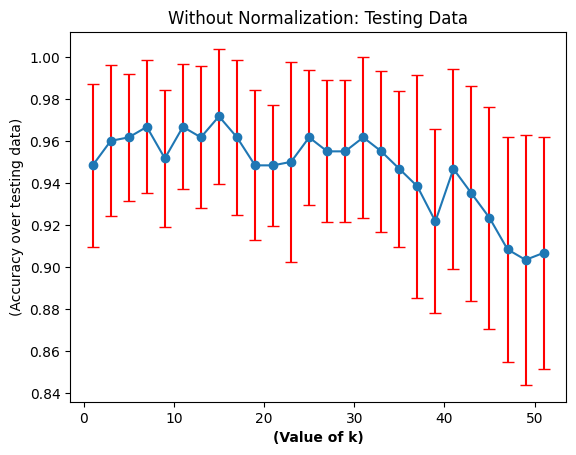

In [93]:
std_testing_accuracy= [np.std(testing_accuracies[k]) for k in k_values]
plt.errorbar(k_values, avg_testing_accuracy, yerr=std_testing_accuracy, label='Third Graph', fmt='-o', capsize=4, capthick=1, ecolor='red')
plt.xlabel('(Value of k)', fontweight='bold')
plt.ylabel('(Accuracy over testing data)')
plt.title('Without Normalization: Testing Data')
plt.show()

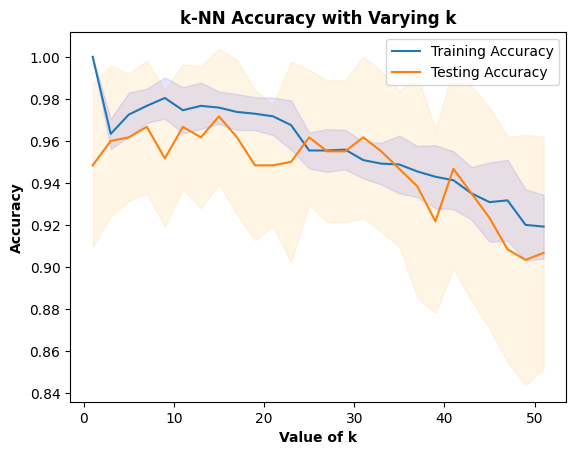

In [94]:
k_values = np.array(k_values)
avg_training_accuracy = np.array(avg_training_accuracy)
std_training_accuracy = np.array(std_training_accuracy)
avg_testing_accuracy = np.array(avg_testing_accuracy)
std_testing_accuracy = np.array(std_testing_accuracy)
plt.plot(k_values, avg_training_accuracy, label='Training Accuracy')
plt.fill_between(k_values, avg_training_accuracy - std_training_accuracy, avg_training_accuracy + std_training_accuracy, alpha=0.1, color='blue')
plt.plot(k_values, avg_testing_accuracy, label='Testing Accuracy')
plt.fill_between(k_values, avg_testing_accuracy - std_testing_accuracy, avg_testing_accuracy + std_testing_accuracy, alpha=0.1, color='orange')
plt.xlabel('Value of k', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('k-NN Accuracy with Varying k', fontweight='bold')
plt.legend()
plt.show()

In [95]:
optimal_k = k_values[0]
max_accuracy = 0
min_std_dev = np.inf
for k, mean_acc, std_dev in zip(k_values, avg_testing_accuracy, std_testing_accuracy):
    if mean_acc > max_accuracy or (mean_acc == max_accuracy and std_dev < min_std_dev):
        optimal_k = k
        max_accuracy = mean_acc
        min_std_dev = std_dev
print(f"Optimal k is {optimal_k} with Testing Accuracy: {max_accuracy} and Standard Deviation: {min_std_dev}")

Optimal k is 15 with Testing Accuracy: 0.9716666666666665 and Standard Deviation: 0.03210226714043036


The best value of k based on the graph and the code I wrote is 15 which is different than the value we got earlier. However, the difference is not big, and shows that feature scale has a direct impact on the optimal value of k to consider. 
This version of k-nn has somewhat a similar performance to the the version with feature normalization and one would argue that it has a somewhat better performance even this may be the result of several things: 1) The features have similar scaling/magnitude so normalizing won't have a huge impact on the prediciton performance. 2) The original scales might include some meanigful information for prediction that might be lost during normalization since all features will contribute equally. These explanations also apply to the fact we have somewhat similar standard deviations (with normalizing the std is kind of smaller than without). Normalization generally improves performance but there exists cases such as ours where it's not necessary and might even hurt performance.
